<a href="https://colab.research.google.com/github/Tanjib-Rafi/Heart-Failure-Prediction/blob/main/HeartFailurePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [170]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [171]:
import numpy as np
import pandas as pd
import sklearn

In [172]:
dataset = pd.read_csv('/content/drive/MyDrive/datasets/heart_failure_clinical_records_dataset.csv')
X = dataset.iloc[:, 0:12].values
y = dataset.iloc[:, -1].values

In [173]:
dataset

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [174]:
X

array([[7.500e+01, 0.000e+00, 5.820e+02, ..., 1.000e+00, 0.000e+00,
        4.000e+00],
       [5.500e+01, 0.000e+00, 7.861e+03, ..., 1.000e+00, 0.000e+00,
        6.000e+00],
       [6.500e+01, 0.000e+00, 1.460e+02, ..., 1.000e+00, 1.000e+00,
        7.000e+00],
       ...,
       [4.500e+01, 0.000e+00, 2.060e+03, ..., 0.000e+00, 0.000e+00,
        2.780e+02],
       [4.500e+01, 0.000e+00, 2.413e+03, ..., 1.000e+00, 1.000e+00,
        2.800e+02],
       [5.000e+01, 0.000e+00, 1.960e+02, ..., 1.000e+00, 1.000e+00,
        2.850e+02]])

In [175]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X)

In [176]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [177]:
X_train.shape

(239, 12)

In [178]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [179]:
model = Sequential()
model.add(Dense(128, input_dim=12, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [180]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 128)               1664      
                                                                 
 dense_28 (Dense)            (None, 16)                2064      
                                                                 
 dense_29 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3,745
Trainable params: 3,745
Non-trainable params: 0
_________________________________________________________________


In [181]:
X_train.shape

(239, 12)

In [182]:
history = model.fit(X_train, y_train, epochs = 100,verbose=True,batch_size=64)

Epoch 1/100
4/4 [==============================] - 1s 5ms/step - loss: 0.6924 - accuracy: 0.4895
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6554 - accuracy: 0.7406
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6308 - accuracy: 0.7029
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 0.6112 - accuracy: 0.7029
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 0.5965 - accuracy: 0.7029
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 0.5862 - accuracy: 0.7029
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5774 - accuracy: 0.7029
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 0.5663 - accuracy: 0.7029
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 0.5539 - accuracy: 0.7029
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 0.5397 - accuracy: 0.7029
Epoch 11/100
4/4 [===========

In [183]:
acd = history.history['accuracy']
loss = history.history['loss']

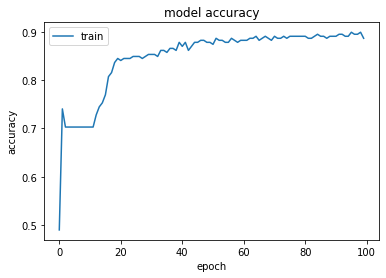

<Figure size 432x288 with 0 Axes>

In [184]:
from matplotlib import pyplot as plt
plt.plot(acd)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc = 'upper left')
plt.show()
plt.savefig('accuracy_curve.png')

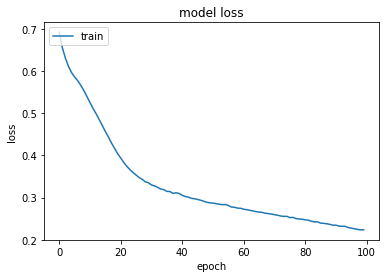

<Figure size 432x288 with 0 Axes>

In [185]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc = 'upper left')
plt.show()
plt.savefig('loss_curve.png')

In [186]:
history_test = model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.6711 - accuracy: 0.7167


In [187]:
history_test

[0.6710608005523682, 0.7166666388511658]